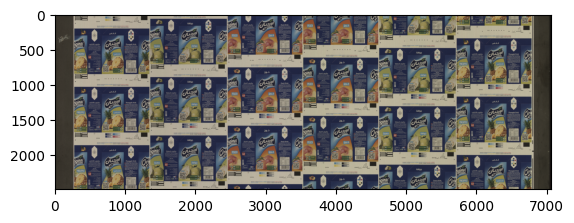

In [1]:
import os
from skimage import io
from matplotlib import pyplot as plt
path = '/Users/USER/Desktop/HACKATHON/data/Job1.bmp'
im = io.imread(os.path.join(path))

plt.imshow(im)

In [6]:
import fitz  # PyMuPDF
import os

def pdf_to_jpg(pdf_path, output_folder, zoom_x=2.0, zoom_y=2.0):
    pdf_document = fitz.open(pdf_path)
 
    # Create a zoom matrix to increase resolution
    mat = fitz.Matrix(zoom_x, zoom_y)
 
    for page_number in range(pdf_document.page_count):
        page = pdf_document[page_number]
        image = page.get_pixmap(matrix=mat)  # apply the zoom matrix
 
        jpg_filename = os.path.join(output_folder, f'page_{page_number + 1}.jpg')
        image.save(jpg_filename)
 
    pdf_document.close()

# Usage example
pdf_path = '/Users/USER/Desktop/HACKATHON/samples/SA-A067.pdf'  # Replace 'input.pdf' with the path to your PDF file
output_folder = '/Users/USER/Desktop/HACKATHON/samples_images'  # Output folder where JPG images will be saved
os.makedirs(output_folder, exist_ok=True)

pdf_to_jpg(pdf_path, output_folder)

In [7]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR'

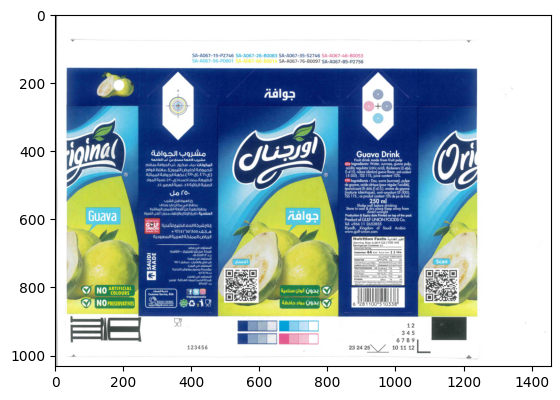

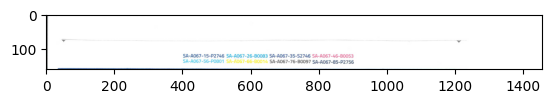

(160, 1457, 3)


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

# Load the image
image = cv2.imread('/Users/USER/Desktop/HACKATHON/samples_images/page_1.jpg')

import cv2
import pytesseract
# from pdf2image import convert_from_path

# If the image is read correctly, it shouldn't be None
if image is not None:
    # Convert from BGR to RGB if you need to display with libraries like matplotlib
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
else:
    print("Error reading the image.")

# Convert to appropriate format for processing
img_array = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Rotate the image to make it vertical
rotated_img = cv2.rotate(img_array, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Extract the top portion for ID detection
top_portion = rotated_img[:160]

plt.imshow(rotated_img)
plt.show()

plt.imshow(top_portion)
plt.show()

print(top_portion.shape)



In [18]:
gray_image = cv2.cvtColor(top_portion, cv2.COLOR_BGR2GRAY)

In [19]:
extracted_numbers = pytesseract.image_to_string(gray_image, config='--psm 6 outputbase digits')

# Extract the first 8 digits
first_8_numbers = ''.join(filter(str.isdigit, extracted_numbers))[:8]

print("Extracted Numbers:", first_8_numbers)

PermissionError: [WinError 5] Access is denied